In [ ]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
path = Path('.')
data_path = path/'data'
model_preds_path = path/'model_preds'

In [ ]:
test_xs = pd.read_pickle(data_path/'test_xs.pkl')
test_y = pd.read_pickle(data_path/'test_y.pkl')
weights = np.load(model_preds_path/'weights.npy')
test_preds = np.load(model_preds_path/'dt_adj_test_preds.npy')
data_preds = np.load(model_preds_path/'dt_adj_data_preds.npy')
data_xs = pd.read_pickle(data_path/'data_xs.pkl')

In [ ]:
test_sigs = test_xs[test_preds==1]
test_y_sigs = test_y[test_preds==1]
real_test_sigs = test_sigs[test_y_sigs==1]
fake_test_sigs = test_sigs[test_y_sigs==0]

In [ ]:
weights_sigs = weights[test_preds==1]
weights_real_test_sigs = weights_sigs[test_y_sigs==1]
weights_fake_test_sigs = weights_sigs[test_y_sigs==0]

In [ ]:
data_sigs = data_xs[data_preds==1]

In [ ]:
colors = ("#ff9900", "#33cc33", "#6666cc", "#ff6666")

In [ ]:
def add_atlas_text(ax):
    plt.text(0.05, 0.93, 'ATLAS Open Data', transform=ax.transAxes, fontsize=13)
    plt.text(0.05, 0.90, 'for education', transform=ax.transAxes, style='italic', fontsize=8)
    plt.text(0.05, 0.85, '$\sqrt{s}$=13 TeV, $\int$L dt = 10 fb$^{-1}$', transform=ax.transAxes, fontsize=10)
    plt.text(0.05, 0.80, r'WZ$\rightarrow$l$\mathrm{\nu}$ll', transform=ax.transAxes, fontsize=13)

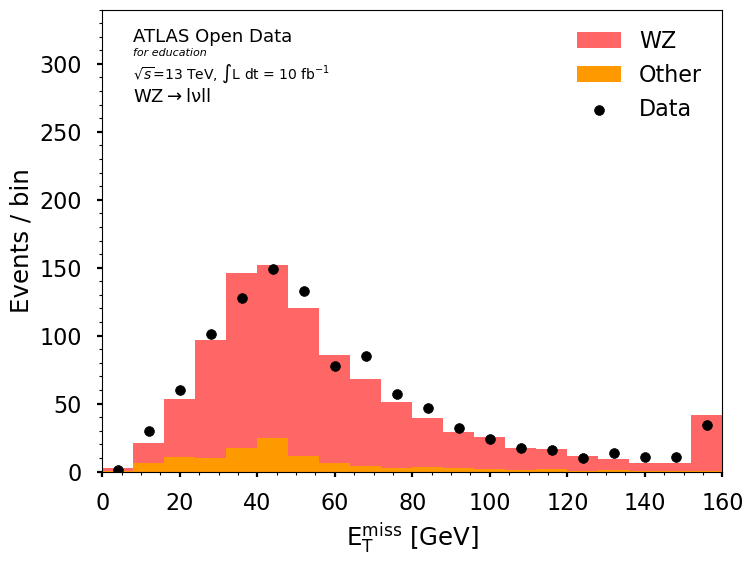

In [ ]:
plt.style.use('seaborn-v0_8-poster')
plt.figure(figsize=(8, 6))

bins = np.linspace(0, 160, 21)
bkg_counts = np.histogram(fake_test_sigs['etmiss'].clip(upper=160), bins=bins, weights=weights_fake_test_sigs*10)[0]
plt.bar(bins[:-1], bkg_counts, width=8, align='edge', label='Other', color=colors[0])
sig_counts = np.histogram(real_test_sigs['etmiss'].clip(upper=160), bins=bins, weights=weights_real_test_sigs*10)[0]
plt.bar(bins[:-1], sig_counts, bottom=bkg_counts, width=8, align='edge', label='WZ', color=colors[-1])

data_counts = np.histogram(data_sigs['etmiss'].clip(upper=160), bins=bins)[0]
ax = plt.gca()
ax.scatter(bins[:-1][data_counts>0] + 4, data_counts[data_counts>0], label='Data', 
               color='black', marker='o', s=50, zorder=10)

plt.ylabel('Events / bin')
plt.xlabel(r'$\mathrm{E_{T}^{miss}}$ [GeV]')
plt.ylim(0, 340)
plt.xlim(0, 160)
ax.xaxis.set_major_locator(plt.MultipleLocator(20))
ax.xaxis.set_minor_locator(plt.MultipleLocator(5))
ax.yaxis.set_minor_locator(plt.MultipleLocator(10))
ax.yaxis.set_major_locator(plt.MultipleLocator(50))

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handle for handle in reversed(handles)],[label for label in reversed(labels)], frameon=False)

add_atlas_text(ax)